# Fährt der Zug bei Regen noch? 🚉

<img src="https://www.biorama.eu/wp-content/uploads/2016/02/Bildschirmfoto-2016-02-26-um-17.14.57.png"></img>

### Project Aim
This Project aims to correlate, visualize and find patterns regarding the developments in the Viennese public transport grid and gauging public sentiment in correlation to such incidents. 



### Team Members
Julian Deleja-Hotko\
Nicolas Markl\
Dionis Ramadani

### Data Sources
**// TODO: DIE VERSCHIEDENEN DATEN GENAUER BESCHREIBEN**

##### [Digitales Wien / Open Government Data Portal Wien](https://digitales.wien.gv.at/open-data/) - REST Endpoint
Several hundred data sets provide detailed information about one-way streets, real-time information from Wiener Linien, historical aerial photographs, measurement data of air pollutants or WLAN locations, to name just a few areas.

##### [Öffi.at](öffi.at)  - XML / Web Scraping
A website gathering and organizing historical data about Wiener Linien outages, courtesy of Klaus Kirnbauer.\
Data available starting from July 2020.

##### [Twitter@WienerLinien](https://twitter.com/wienerlinien) - Web Scraping
A social media platform popular in Vienna with dedicated accounts from public service providers, useful for gauging sentiment about specific routes in Vienna

##### [data.gv.at](data.gv.at) - Flat Files
Gathering general info about the public transport network, usage, etc.



### Architecture Diagram
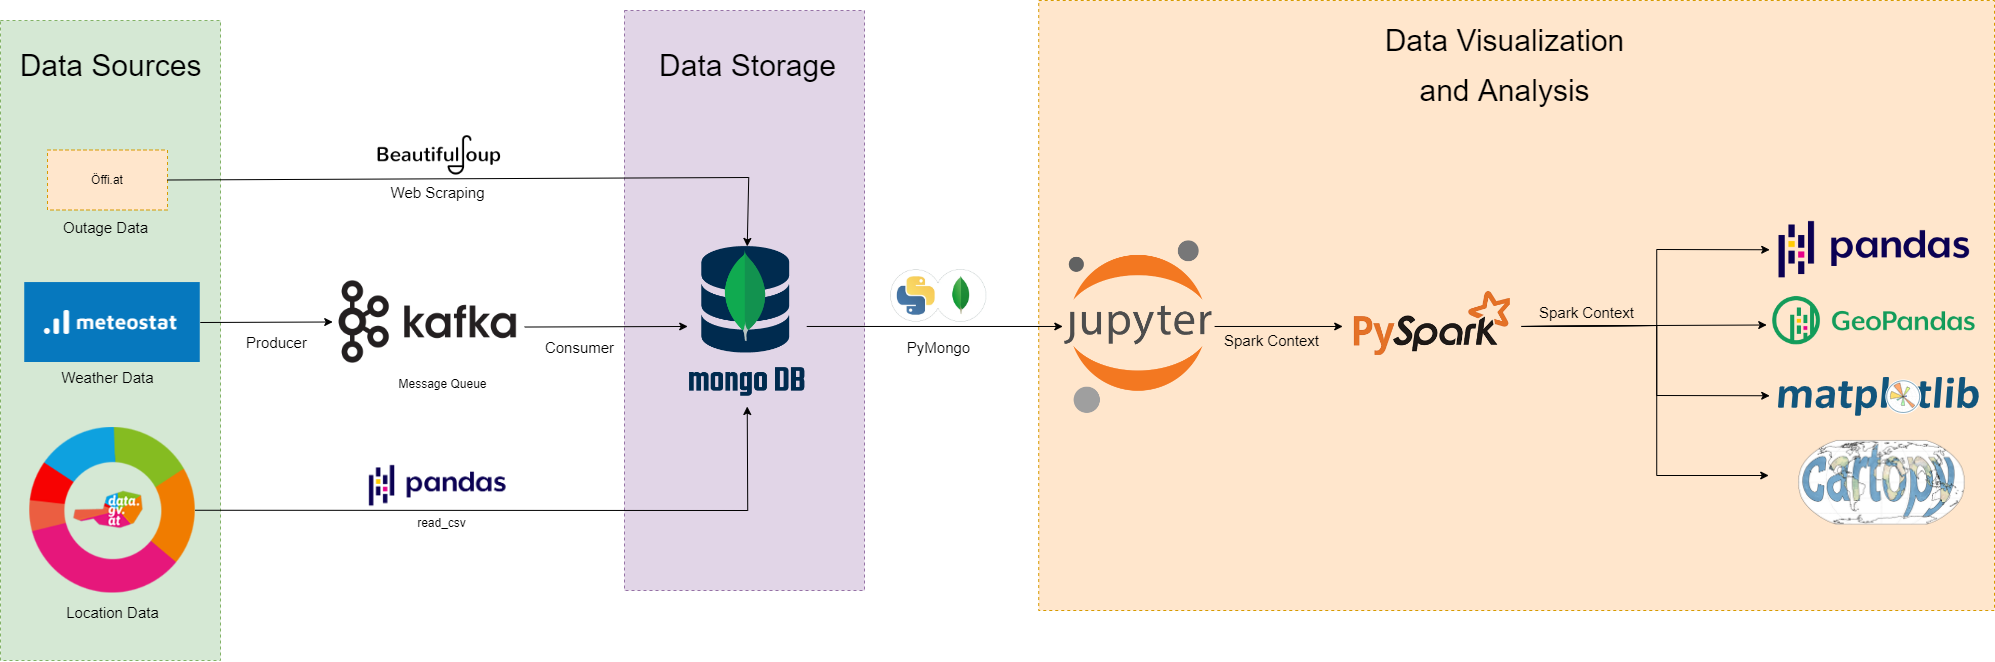

### Packages
Here we'll install and import all relevant Python packages for this project

In [2]:
!pip install pymongo
!pip install pyspark
!pip install requests
!pip install beautifulsoup4
!pip install pyspark 
!pip install pandas
!pip install geopandas
!pip install meteostat
!pip install geoplot

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to buil

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\notyo\anaconda3\python.exe' 'C:\Users\notyo\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' get_requires_for_build_wheel 'C:\Users\notyo\AppData\Local\Temp\tmpsbjd32m0'
       cwd: C:\Users\notyo\AppData\Local\Temp\pip-install-8gko6qu3\cartopy_1908855f22d64a9188ac25c90b60a12e
  Complete output (3 lines):
  setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    warnings.warn(
  Proj 8.0.0 must be installed.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\notyo\anaconda3\python.exe' 'C:\Users\notyo\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' get_requires_for_build_wheel 'C:\Users\notyo\AppData\Local\Temp\tmpha_zxcfd'
       cwd: C:\Users\notyo\AppData\Local\Temp\pip-install-8gko6qu3\cartopy_5dd54829f79744eebb3c5c72e109682

    geoplot 0.4.4 depends on cartopy
    geoplot 0.4.3 depends on cartopy
    geoplot 0.4.2 depends on cartopy
    geoplot 0.4.1 depends on cartopy
    geoplot 0.4.0 depends on cartopy
    geoplot 0.3.2 depends on cartopy
    geoplot 0.3.1 depends on cartopy
    geoplot 0.3.0 depends on cartopy
    geoplot 0.2.4 depends on cartopy
    geoplot 0.2.3 depends on cartopy
    geoplot 0.2.2 depends on cartopy
    geoplot 0.2.1 depends on cartopy
    geoplot 0.2.0 depends on cartopy
    geoplot 0.1.2 depends on cartopy
    geoplot 0.1.1 depends on cartopy
    geoplot 0.0.4 depends on cartopy
    geoplot 0.0.3 depends on cartopy
    geoplot 0.0.2 depends on cartopy

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict




    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\notyo\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\notyo\\AppData\\Local\\Temp\\pip-install-8gko6qu3\\cartopy_c1e7f1d2961d41e7ac08d223213aa881\\setup.py'"'"'; __file__='"'"'C:\\Users\\notyo\\AppData\\Local\\Temp\\pip-install-8gko6qu3\\cartopy_c1e7f1d2961d41e7ac08d223213aa881\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\notyo\AppData\Local\Temp\pip-pip-egg-info-2sqc9t_p'
         cwd: C:\Users\notyo\AppData\Local\Temp\pip-install-8gko6qu3\cartopy_c1e7f1d2961d41e7ac08d223213aa881\
    Complete output (7 lines):
    running egg_info
    creating C:\Users\notyo\App

In [3]:
import requests
import re
from pymongo import MongoClient
from pyspark import SparkContext
from bs4 import BeautifulSoup
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from json import dumps
import meteostat as ms
import datetime as dt
from dateutil import parser
import geopandas as gpd
import geoplot

ModuleNotFoundError: No module named 'geoplot'

### Gathering, Storing and Cleaning our Data
The data will be collected and processed via Kafka, analyzed with Spark and all the relevant data will be stored on our MongoDB instance after an ETL-style pipeline.


##### Setting up DB connection
We're connecting to our local MongoDB instance, this is to pipe our extracted and transformed data into the DB later.

In [4]:
# Provide the mongodb connection string
# For non-Julian Laptops CONNECTION_STRING = 'mongodb://localhost:27017'
CONNECTION_STRING = 'mongodb://localhost:27017'

# Create a connection using MongoClient
myclient = MongoClient(CONNECTION_STRING)

# Check DB collections
for db in myclient.list_databases():
    print(db)

{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False}
{'name': 'config', 'sizeOnDisk': 73728, 'empty': False}
{'name': 'hackernews', 'sizeOnDisk': 81920, 'empty': False}
{'name': 'immodb', 'sizeOnDisk': 10588160, 'empty': False}
{'name': 'local', 'sizeOnDisk': 409600, 'empty': False}
{'name': 'wienerLinien', 'sizeOnDisk': 5537792, 'empty': False}


##### Scraping together historical Wiener Linien Data
For this step, we're using the Öffi.at website by Klaus Kirnbauer who has aggregated all historical Wiener Linien public transport incidents in an easily queriable fashion.

Since Öffi.at uses conveniently utilizes server-side rendering, we can use BeautifulSoup for our data transformation. 

Now first, we need to model a framework of parsing the relevant data from the 1520 available historical sites;\
Since the data is variable in some cases we have decided on the following format:

| [Affected Lines] | [Affected Stations] | Start Time | End Time | Time Problem Fixed | Title |
|------------------|---------------------|------------|----------|--------------------|-------|


In [5]:
# Format
# ([Affected Lines], [Affected Stations], Start Time, End Time, Time Problem Fixed, Title)
def parse_oeffi_soup(soup):
    data = list(map(lambda li: (list(map(lambda trafficline: trafficline.getText(), li.select('.trafficline'))), 
                                 list(map(lambda liSub: liSub.split('<li>')[1],
                                     list(filter(re.compile('[^+]*\n<b>Von</b>:.').match, str(li).split('<br/>')))[0].split('</li>')[0:-1])),
                                 list(filter(re.compile('[^+]*\n<b>Von</b>:.').match, str(li).split('<br/>')))[0].split('<b>Von</b>: ')[1],
                                 list(filter(re.compile('\n<b>Bis</b>:').match, str(li).split('<br/>'))),
                                 list(filter(re.compile('\n<b>Verkehrsaufnahme</b>:').match, str(li).split('<br/>'))),
                                 li.select('.disruption-title')[0].getText()),
                     soup.select('li.disruption')))

    return list(map(lambda x: (x[0], x[1], x[2], x[3][0].split('</b>: ')[1] if len(x[3]) > 0 else None, x[4][0].split('</b>: ')[1] if len(x[4]) > 0 else None, x[5]), data))

And now we can run this model on all the available sites and aggregate this data! \
For estimation, this takes around 15-20 minutes to run to completion with all 1520 requests.

In [ ]:
data = []

for i in range(1, 1520):
    URL = 'https://xn--ffi-rna.at/?archive=1&page=' + str(i)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    data.extend(parse_oeffi_soup(soup))
    
display(data)

Now we shall create a database for inserting our scraped data:

In [6]:
# Create Database
db = myclient['wienerLinien']

After arduously gathering and cleaning our data, we'll now convert it to a Dataframe and insert it into our Mongo DB instance:

In [20]:
# Transform into Pandas DF
df = pd.DataFrame(data, columns=['Affected Lines', 'Affected Stations', 'Start Time', 'End Time', 'Fixed Time', 'Title'])

# Insert
db.stoerungen.drop()
db.stoerungen.insert_many(df.to_dict('records'))

NameError: name 'data' is not defined

Now we can also check if we have inserted our data correctly:

In [21]:
stoerungen_col = db['stoerungen']
print('Stoerungen: ', len(list(stoerungen_col.find())))

Stoerungen:  0


##### Gathering Geodata about Stations
For this step we read in a data.gv.at flat file for further usage in visualizing and interpreting the data:

In [26]:
import geopandas as gpd
#parse flatfile to pandas dataframe
haltestellen = pd.read_csv('wienerlinien-ogd-haltestellen.csv', sep=';')
print(haltestellen.head())

#insert df into mongoDB
db.haltestellen.drop()
db.haltestellen.insert_many(haltestellen.to_dict('records'))

       DIVA        PlatformText Municipality  MunicipalityID  Longitude  \
0  60200001  Schrankenberggasse         Wien           90001  16.389807   
1  60200002          Achengasse         Wien           90001  16.448898   
2  60200003  Ada-Christen-Gasse         Wien           90001  16.385953   
3  60200004     Adam-Betz-Gasse         Wien           90001  16.535191   
4  60200005      Adamovichgasse         Wien           90001  16.337840   

    Latitude  
0  48.173801  
1  48.284526  
2  48.152866  
3  48.215611  
4  48.142167  


In [27]:
haltestellen_col = db['haltestellen']
print('Haltestellen: ', len(list(haltestellen_col.find())))

Haltestellen:  10860


##### Gathering Twitter data 

For XYZ reasons we're using the Twitter API to gather XYZ as follows:

// TODO: Write Twitter API code

In [1]:
import tweepy

client=tweepy.Client("AAAAAAAAAAAAAAAAAAAAAHJMdgEAAAAAaazY9nw6SjvKprN4BDsBWVjfIZU%3DlzAqZ4fbC4UTH1caM2XLfZYlTjszcqASp43jAiDcBBO9Lsv08H")
public_tweets =client.search_recent_tweets('"@WienerLinien" (Ausfall OR Störung)')

for tweet in public_tweets[0]:
    print(tweet.text)

@LandauDaniel @wienerlinien @Tom_Harb Beim Hund im Auto kommt die @LPDWien und schlägt die Fenster ein. In Wien werben die @wienerlinien damit, dass in nur 20min eine klimatisierte Tram kommt. Vl, kommt auf die Linie drauf an und dann ist eine Störung (wie immer)
@oebb die frage geht auch an @wienerlinien weil wien mobil zeigt keine störung
@wienerlinien Gibt es einen Grund dafür, dass die 44 Richtung Schottentor in den letzten Wochen &amp; Monaten so unfassbar unzuverlässig fährt? Laut Wien Mobil App keine Störung, sollte normal alle 7min fahren, an der Haltestelle steht kommt erst in 15min.. So macht das keinen Spaß☹️ https://t.co/FmW13vYhzv


##### Setting up Spark via SparkContext for MongoDB

In [10]:
spark = SparkSession \
    .builder \
    .appName("WienerLinienAnalyse") \
    .getOrCreate()


### Analysis

Graphs, maps and heatmaps showing / highlighting patterns and outages of the Viennese public transport system.

#### Line Outage Analysis
Firstly, we shall investigate which lines have been most affected by outages since June 2020.

For this, we will read in our data from the DB into a Spark Dataframe:

In [85]:
dfStoerung = pd.DataFrame(list(db['stoerungen'].find()), columns = ['Affected Lines','Affected Stations','Start Time','End Time','Time Problem Fixed','Title'])
sparkDf = spark.createDataFrame(dfStoerung) 
sparkDf.printSchema()
sparkDf.show()

root
 |-- Affected Lines: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- Affected Stations: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- Start Time: string (nullable = true)
 |-- End Time: string (nullable = true)
 |-- Time Problem Fixed: double (nullable = true)
 |-- Title: string (nullable = true)

+--------------+--------------------+----------------+----------------+------------------+--------------------+
|Affected Lines|   Affected Stations|      Start Time|        End Time|Time Problem Fixed|               Title|
+--------------+--------------------+----------------+----------------+------------------+--------------------+
|          [42]|[Antonigasse, Edu...|11.06.2022 08:50|11.06.2022 09:40|               NaN|        Falschparker|
|          [7A]|[ Schedifkaplatz,...|11.06.2022 08:58|11.06.2022 23:59|               NaN|      : Verspätungen|
|         [66A]|[Alterlaa, Atzger...|11.06.2022 09:02|11.06.2022 23:59|     

For all the further steps of analysis, we will need to define a temporary view which represents our MongoDB table:

In [ ]:
sparkDf.createTempView('stoerungen')

Next, we will analyze our data based on the Affected Lines:

In [86]:
affectedDf = spark.sql("select `Affected Lines` from stoerungen")
affectedDf.show()

+--------------+
|Affected Lines|
+--------------+
|          [42]|
|          [7A]|
|         [66A]|
|          [U3]|
|         [40A]|
|           [6]|
|           [1]|
|           [1]|
|           [1]|
|           [1]|
|           [D]|
|           [D]|
|           [1]|
|           [1]|
|           [1]|
|           [1]|
|          [71]|
|          [U1]|
|          [U6]|
|          [U3]|
+--------------+
only showing top 20 rows



Now we will use the power of Spark to count all occurences of outages for all lines:

In [87]:
# Convert to List and flatMap, for count
affected = affectedDf.rdd \
                     .flatMap(lambda x: x) \
                     .flatMap(lambda x: x) \
                     .map(lambda w: (w,1)) \
                     .reduceByKey(lambda a, b: a+b) 

affected.collect() # Output

[('48A', 212),
 ('11A', 136),
 ('44', 392),
 ('49A', 10),
 ('10', 456),
 ('O', 609),
 ('29A', 60),
 ('14A', 236),
 ('69A', 81),
 ('26A', 111),
 ('64A', 38),
 ('50A', 15),
 ('94A', 8),
 ('N29', 32),
 ('62A', 53),
 ('54A', 8),
 ('92B', 5),
 ('51A', 8),
 ('58A', 3),
 ('88B', 5),
 ('19A', 3),
 ('56B', 3),
 ('18', 734),
 ('43', 552),
 ('31', 567),
 ('10A', 250),
 ('25', 410),
 ('62', 914),
 ('34A', 6),
 ('24A', 47),
 ('22A', 22),
 ('N71', 84),
 ('37A', 24),
 ('97A', 6),
 ('N23', 4),
 ('36A', 22),
 ('72A', 2),
 ('N60', 68),
 ('88A', 3),
 ('N38', 10),
 ('99A', 1),
 ('U3', 1986),
 ('1', 1204),
 ('U2Z', 131),
 ('9', 717),
 ('60A', 37),
 ('U2', 1257),
 ('5B', 78),
 ('79A', 4),
 ('1A', 101),
 ('32A', 47),
 ('13A', 476),
 ('16A', 56),
 ('N20', 7),
 ('67A', 16),
 ('15A', 103),
 ('84A', 16),
 ('N62', 9),
 ('61A', 28),
 ('N26', 8),
 ('7B', 2),
 ('N65', 5),
 ('49B', 1),
 ('47B', 5),
 ('N31', 12),
 ('N24', 3),
 ('38', 297),
 ('11', 577),
 ('37', 296),
 ('46', 486),
 ('5', 710),
 ('36B', 37),
 ('11B', 2

And now we would like to query this information for the top 20 least and top 20 most affected lines:

In [88]:
# Get top 20 most affected lines
top20 = affected.sortBy(lambda x: x[1], False) \
                .take(20)
top20

[('U3', 1986),
 ('U1', 1717),
 ('U4', 1645),
 ('U6', 1645),
 ('U2', 1257),
 ('1', 1204),
 ('2', 1194),
 ('62', 914),
 ('D', 812),
 ('71', 741),
 ('18', 734),
 ('9', 717),
 ('5', 710),
 ('6', 662),
 ('60', 657),
 ('49', 656),
 ('O', 609),
 ('11', 577),
 ('31', 567),
 ('43', 552)]

In [89]:
# Get top 20 least affected lines
low20 = affected.sortBy(lambda x: x[1]) \
                .take(20)
low20

[('99A', 1),
 ('49B', 1),
 ('N17', 1),
 ('96A', 1),
 ('N68', 1),
 ('52E', 1),
 ('89A', 1),
 ('53A', 1),
 ('72A', 2),
 ('7B', 2),
 ('79B', 2),
 ('99B', 2),
 ('46B', 2),
 ('58A', 3),
 ('19A', 3),
 ('56B', 3),
 ('88A', 3),
 ('N24', 3),
 ('95B', 3),
 ('46A', 3)]

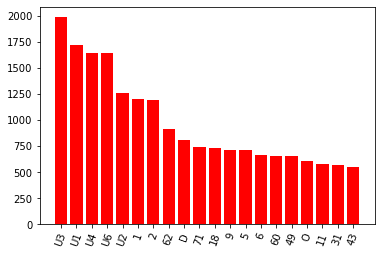

In [137]:
# Top 20 
plt.bar(range(len(top20)), [val[1] for val in top20], align='center', color=['red'])
plt.xticks(range(len(top20)), [val[0] for val in top20])
plt.xticks(rotation=70)
plt.show()

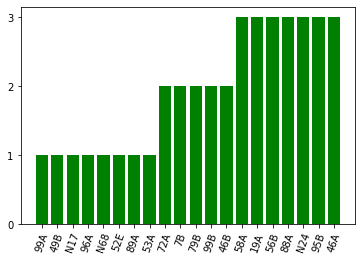

In [141]:
# Lowest 20 
plt.bar(range(len(low20)), [val[1] for val in low20], align='center', color=['green'])
plt.yticks([0,1,2,3])
plt.xticks(range(len(low20)), [val[0] for val in low20])
plt.xticks(rotation=70)
plt.show()

From this we can immediately see that lines which are heavily utilized such as the U3 and U1 which service the city center tend to have much more outages reported! 

From the lowest 10, a few are Nightlines which don't need to deal with a lot of traffic anyways and in general just lesser known lines, mostly servicing the car friendly areas such as the 22nd district (99A, 96A, 89A, 99B, etc.)

##### Common Outage Causes

For this we will attempt to analyze more common causes for outages, such as false parking, damaged rails or the recent pride parade. 🏳️‍🌈

In [143]:
demonstrationCount = spark.sql("""select (select count(title) from stoerungen where title like '%Rettungseinsatz%') as Rettungseinsatz,
                                         (select count(title) from stoerungen where title like '%Falschparker%') as Falschparker,
                                         (select count(title) from stoerungen where title like '%Feuerwehr%') as Feuerwehr,
                                         (select count(title) from stoerungen where title like '%Polizei%') as Polizeieinsatz,
                                         (select count(title) from stoerungen where title like '%Demonstration%') as Demo,
                                         (select count(title) from stoerungen where title like '%Verkehrsbedingt%') as Stau,
                                         (select count(title) from stoerungen where title like '%Verkehrsunfall%') as Verkehrsunfall,
                                         (select count(title) from stoerungen where title like '%Schadhaft%') as FahrzeugSchaden,
                                         (select count(title) from stoerungen where title like '%Gleisschaden%') as Gleisschaden,
                                         (select count(title) from stoerungen where title like '%Regenbogenparade%') as Regenbogen""")
demonstrationCount.show()

+---------------+------------+---------+--------------+----+----+--------------+---------------+------------+----------+
|Rettungseinsatz|Falschparker|Feuerwehr|Polizeieinsatz|Demo|Stau|Verkehrsunfall|FahrzeugSchaden|Gleisschaden|Regenbogen|
+---------------+------------+---------+--------------+----+----+--------------+---------------+------------+----------+
|           2512|        2021|      685|          1547|1401| 929|          3029|           1909|         163|        14|
+---------------+------------+---------+--------------+----+----+--------------+---------------+------------+----------+



In [185]:
demonstrationCountPandas = demonstrationCount.toPandas() 
colnames = list(demonstrationCountPandas)
values = demonstrationCountPandas.to_numpy().tolist()[0]

data = list(zip(colnames, values))
data.sort(key=lambda x: x[1], reverse=True)
data

[('Verkehrsunfall', 3029),
 ('Rettungseinsatz', 2512),
 ('Falschparker', 2021),
 ('FahrzeugSchaden', 1909),
 ('Polizeieinsatz', 1547),
 ('Demo', 1401),
 ('Stau', 929),
 ('Feuerwehr', 685),
 ('Gleisschaden', 163),
 ('Regenbogen', 14)]

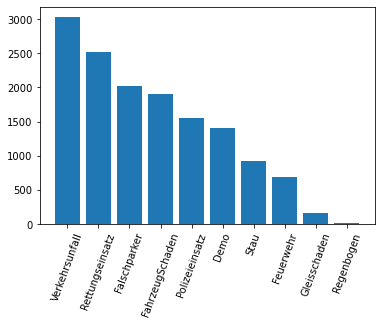

In [186]:
plt.bar(range(len(data)), [val[1] for val in data], align='center')
plt.xticks(range(len(data)), [val[0] for val in data])
plt.xticks(rotation=70)
plt.show()

Here we can obviously see that there have been some common issues in the last few years.
For example, road accidents is the most cited reason for outages we've inspected, followed by ambulance services and wrong parkers! 

Demonstrations, police activity and damaged wagons also account for many reported reasons while we can also observe a small number attributed to railway issues and even 14 outages directly related to the Rainbow Parade. :-)  


#### Generating a Heat Map of most affected stations
First we need to create a geodataframe. It is similar to a regular pandas dataframe but the longtitude and latitude are transformed to a point.

In [5]:
tb_gdf = gpd.GeoDataFrame(haltestellen,
                          geometry=gpd.points_from_xy(haltestellen.Longitude, haltestellen.Latitude))

tb_gdf.head()

,DIVA,PlatformText,Municipality,MunicipalityID,Longitude,Latitude,geometry
0,60200001,Schrankenberggasse,Wien,90001,16.389807,48.173801,POINT (16.38981 48.17380)
1,60200002,Achengasse,Wien,90001,16.448898,48.284526,POINT (16.44890 48.28453)
2,60200003,Ada-Christen-Gasse,Wien,90001,16.385953,48.152866,POINT (16.38595 48.15287)
3,60200004,Adam-Betz-Gasse,Wien,90001,16.535191,48.215611,POINT (16.53519 48.21561)
4,60200005,Adamovichgasse,Wien,90001,16.337840,48.142167,POINT (16.33784 48.14217)


In [ ]:
##### Generating map of Vienna
Now we will use the shapefile (.shp) provided by the austrian goverment, to generate a plot of vienna. 

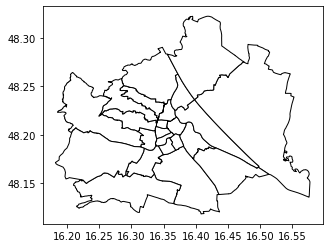

In [6]:
viennaBez = gpd.read_file('./BEZIRKSGRENZEOGDPolygon.shp');
viennaBezPlot = viennaBez.plot(color='white', edgecolor='black');
viennaBezPlot.plot();

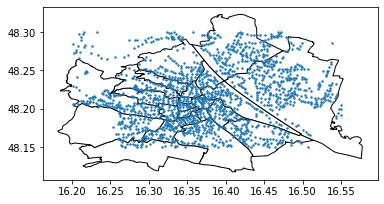

In [7]:
viennaBez = gpd.read_file('./BEZIRKSGRENZEOGDPolygon.shp');
viennaBezPlot = viennaBez.plot(color='white', edgecolor='black');
haltestellen=haltestellen[(haltestellen.Longitude > 16.2) & (haltestellen.Longitude < 16.55) & (haltestellen.Latitude<48.3) & (haltestellen.Latitude >48.15)]
tb_gdf = gpd.GeoDataFrame(haltestellen,
                          geometry=gpd.points_from_xy(haltestellen.Longitude, haltestellen.Latitude))

tb_gdf.head()
tb_gdf.plot( ax=viennaBezPlot,markersize=2);

<GeoAxesSubplot:>

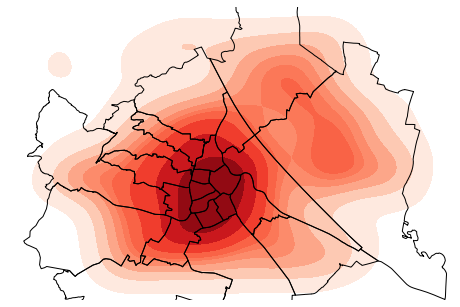

In [8]:
import geoplot
ax = geoplot.polyplot(viennaBez, projection=geoplot.crs.AlbersEqualArea(),zorder=1)
geoplot.kdeplot(tb_gdf, ax=ax,cmap='Reds', shade=True)

## What influence does the weather have?

To find out, we look at the weather metrics whenever there is a disruption

In [8]:
colweather=db["Weather"]
myfilter={"prcp":1,"wspd":1,"tavg":1}
mydoc=colweather.find({},myfilter)
for x in mydoc:
    print(x)

{'_id': ObjectId('62b88875831a0dfe0e5023b2'), 'tavg': 25.9, 'prcp': None, 'wspd': 7.8}
{'_id': ObjectId('62b88875831a0dfe0e5023b3'), 'tavg': 22.8, 'prcp': None, 'wspd': 11.6}
{'_id': ObjectId('62b88875831a0dfe0e5023b4'), 'tavg': 24.0, 'prcp': 9.0, 'wspd': 14.0}
{'_id': ObjectId('62b88875831a0dfe0e5023b5'), 'tavg': 24.3, 'prcp': 2.5, 'wspd': 7.5}
{'_id': ObjectId('62b88875831a0dfe0e5023b6'), 'tavg': 22.6, 'prcp': 0.5, 'wspd': 8.7}
{'_id': ObjectId('62b88875831a0dfe0e5023b7'), 'tavg': 21.5, 'prcp': 0.7, 'wspd': 11.7}
{'_id': ObjectId('62b88875831a0dfe0e5023b8'), 'tavg': 25.7, 'prcp': 0.0, 'wspd': 8.9}
{'_id': ObjectId('62b88875831a0dfe0e5023b9'), 'tavg': 26.6, 'prcp': 0.0, 'wspd': 16.8}
{'_id': ObjectId('62b88875831a0dfe0e5023ba'), 'tavg': 23.8, 'prcp': 0.0, 'wspd': 8.6}
{'_id': ObjectId('62b88875831a0dfe0e5023bb'), 'tavg': 22.1, 'prcp': 0.1, 'wspd': 12.3}
{'_id': ObjectId('62b88875831a0dfe0e5023bc'), 'tavg': 22.8, 'prcp': 2.6, 'wspd': 8.9}
{'_id': ObjectId('62b88875831a0dfe0e5023bd'), '